# Modules for Import

In [1]:
import pandas as pd

!pip install pandasai
# !pip install langchain_community
# !pip install langchain_openai

import os
# from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
# from pandasai.helpers.openai_info import get_openai_callback
import logging
import openai

# from langchain_openai.chat_models import ChatOpenAI

# Create a custom logging configuration
logging.basicConfig(level=logging.CRITICAL)

# Read NBA Stats Data CSV from disk 

In [2]:
# Load your data into a pandas DataFrame
df = pd.read_csv('nba-stats-data.csv', low_memory=False)
# set season (year) as main DF index to allow for time series analysis of player data
df = df.reset_index().set_index('season')
df.index = pd.to_datetime(df.index, format='%Y').to_period('Y')
df = df.sort_index(axis=0)
df.head()

,index,assists,blocks,comment,defReb,fga,fgm,fgp,fta,ftm,...,DOB,age,feet,meters,position,active,jersey_number,years_pro,rookie_year,pounds
season,,,,,,,,,,,,,,,,,,,,,
2015,34,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,35,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,36,2.0,0.0,NaN,7.0,7.0,3.0,42.9,2.0,2.0,...,1988-07-16,36.0,"6""7",2.01,F,True,1.0,9.0,2012.0,237.0
2015,37,0.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,38,1.0,1.0,NaN,5.0,5.0,3.0,60.0,6.0,2.0,...,1992-03-22,33.0,"7""3",2.21,C,False,40.0,1.0,2015.0,265.0


# Analysis: Speak to the Data!

In [3]:
df.columns

Index(['index', 'assists', 'blocks', 'comment', 'defReb', 'fga', 'fgm', 'fgp',
       'fta', 'ftm', 'ftp', 'min', 'offReb', 'pFouls', 'plusMinus', 'points',
       'pos', 'steals', 'totReb', 'tpa', 'tpm', 'tpp', 'turnovers',
       'player_id', 'player_name', 'team_code', 'team_name', 'team_id',
       'game_id', 'affiliation', 'college', 'firstname', 'id', 'lastname',
       'country', 'DOB', 'age', 'feet', 'meters', 'position', 'active',
       'jersey_number', 'years_pro', 'rookie_year', 'pounds'],
      dtype='object')

## Set Open AI API Key

In [4]:
os.environ["OPENAI_API_KEY"] = "*******"

llm = OpenAI(openai_api_key=openai.api_key)# Default is BambooLLM

# Set Large Language Model & other DF confirgurations

In [5]:
df_nba = SmartDataframe(df, config={"llm": llm, "conversational": True, "verbose": True})

# Chat with (query data)

In [6]:
df_nba.chat("Which are the top 10 player_names by assists?")

              player_name  assists
season                            
2017          Rajon Rondo     25.0
2020    Russell Westbrook     24.0
2018    Russell Westbrook     24.0
2020    Russell Westbrook     24.0
2018    Russell Westbrook     24.0
2023    Tyrese Haliburton     23.0
2016    Russell Westbrook     22.0
2024           Trae Young     22.0
2016    Russell Westbrook     22.0
2022         James Harden     21.0


,player_name,assists
season,,
2017,Rajon Rondo,25.0
2020,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0
2016,Russell Westbrook,22.0


In [7]:
df_nba.chat("Which are the top 5 player_names by points?")

{'type': 'dataframe', 'value':              player_name  points
season                          
2023         Luka Doncic    73.0
2022      Damian Lillard    71.0
2022    Donovan Mitchell    71.0
2016        Devin Booker    70.0
2023         Joel Embiid    70.0}


,player_name,points
season,,
2023,Luka Doncic,73.0
2022,Damian Lillard,71.0
2022,Donovan Mitchell,71.0
2016,Devin Booker,70.0
2023,Joel Embiid,70.0


In [8]:
df_nba.chat("Which are the top 5 player_names group by blocks?")

,player_name,blocks
766,JaVale McGee,2648.0
78,Andre Drummond,2478.0
1356,Mason Plumlee,1866.0
1167,Kevin Durant,1640.0
1667,Rudy Gobert,1586.0


In [9]:
df_nba.chat("Which are the top 5 player_names group by assists?")

,player_name,assists
1669,Russell Westbrook,13532.0
1214,Kyle Lowry,9276.0
596,Eric Bledsoe,7404.0
846,James Harden,6952.0
1220,Kyrie Irving,6658.0


In [10]:
df_nba.chat("Which are the top 5 distinct player_names by pounds?")

,player_name,pounds
24268,Jusuf Nurkic,290.0
40609,Boban Marjanovic,290.0
24267,Nikola Jokic,284.0
216367,Zion Williamson,284.0
25525,Joel Embiid,280.0


In [11]:
df_nba.chat("Which are the top 5 distinct player_names by meters?")

,player_name,meters
season,,
2015,Edy Tavares,2.21
2015,Kristaps Porzingis,2.21
2015,Boban Marjanovic,2.21
2019,Bol Bol,2.18
2015,Rudy Gobert,2.16


In [12]:
df_nba.chat("Which are the top 5 player_names group by plusMinus?")

,player_name,plusMinus
0,Kevin Durant,8420.0
1,Stephen Curry,5453.0
2,Kyrie Irving,5234.0
3,Danny Green,5004.0
4,Kyle Lowry,4852.0


In [13]:
df_nba.chat("Which are the top 5 player_names by all stats excluding pFouls and turnovers?")

{'type': 'dataframe', 'value':                    index  assists  blocks  defReb      fga     fgm       fgp  \
player_name                                                                    
Norman Powell  706349115   3078.0   543.0  4728.0  19740.0  9177.0   91376.1   
Alec Burks     497168280   3495.0   405.0  5481.0  15078.0  6201.0   68439.9   
Pascal Siakam  486231160   4826.0   792.0  7044.0  18754.0  9278.0   68422.8   
Evan Fournier  485077443   4860.0   342.0  4206.0  21393.0  9360.0   74368.5   
JaVale McGee   483537388   1216.0  2648.0  7460.0  11980.0  7416.0  146170.4   

                  fta     ftm       ftp  ...  player_id  team_id   game_id  \
player_name                              ...                                 
Norman Powell  5439.0  4506.0  110602.5  ...   998634.0    72555  15541269   
Alec Burks     4986.0  4122.0  101819.4  ...   162540.0    49170  14186610   
Pascal Siakam  5542.0  4190.0   82276.6  ...   697424.0    50820  11585508   
Evan Fournier  452

,index,assists,blocks,defReb,fga,fgm,fgp,fta,ftm,ftp,...,player_id,team_id,game_id,id,age,meters,jersey_number,years_pro,rookie_year,pounds
player_name,,,,,,,,,,,,,,,,,,,,,
Norman Powell,706349115,3078.0,543.0,4728.0,19740.0,9177.0,91376.1,5439.0,4506.0,110602.5,...,998634.0,72555,15541269,998634.0,71331.0,4371.90,55224.0,13806.0,4636515.0,494715.0
Alec Burks,497168280,3495.0,405.0,5481.0,15078.0,6201.0,68439.9,4986.0,4122.0,101819.4,...,162540.0,49170,14186610,162540.0,63855.0,3831.30,9675.0,19350.0,3891285.0,414090.0
Pascal Siakam,486231160,4826.0,792.0,7044.0,18754.0,9278.0,68422.8,5542.0,4190.0,82276.6,...,697424.0,50820,11585508,697424.0,45136.0,2955.68,62608.0,7280.0,2935296.0,334880.0
Evan Fournier,485077443,4860.0,342.0,4206.0,21393.0,9360.0,74368.5,4521.0,3639.0,99586.8,...,330813.0,44814,11155605,330813.0,59808.0,3700.62,24297.0,16821.0,3760428.0,383145.0
JaVale McGee,483537388,1216.0,2648.0,7460.0,11980.0,7416.0,146170.4,3408.0,2140.0,79749.6,...,1036408.0,44384,18544508,1036408.0,108632.0,6253.68,0.0,38168.0,5895488.0,792720.0


In [14]:
df_nba.chat("Which are the best players by single game stats?")

,player_name,points,assists,blocks
0,Luka Doncic,73.0,NaN,NaN
1,Donovan Mitchell,71.0,NaN,NaN
2,Damian Lillard,71.0,NaN,NaN
3,Devin Booker,70.0,NaN,NaN
4,Joel Embiid,70.0,NaN,NaN
5,Rajon Rondo,NaN,25.0,NaN
6,Russell Westbrook,NaN,24.0,NaN
7,Russell Westbrook,NaN,24.0,NaN
8,Russell Westbrook,NaN,24.0,NaN
9,Russell Westbrook,NaN,24.0,NaN


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 174, in execute_code
    exec(code, environment)
  File "<string>"

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'subplots_adjust' is not allowed in RestrictedMatplotlib\n"

<Figure size 1000x600 with 0 Axes>

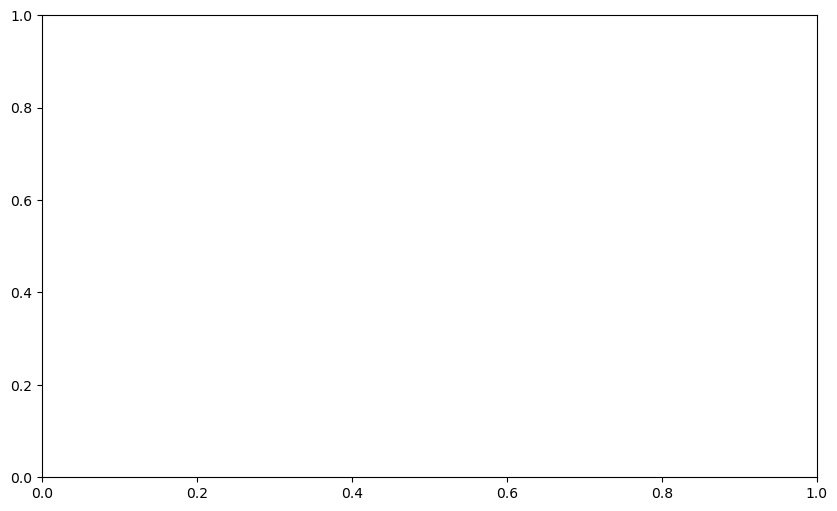

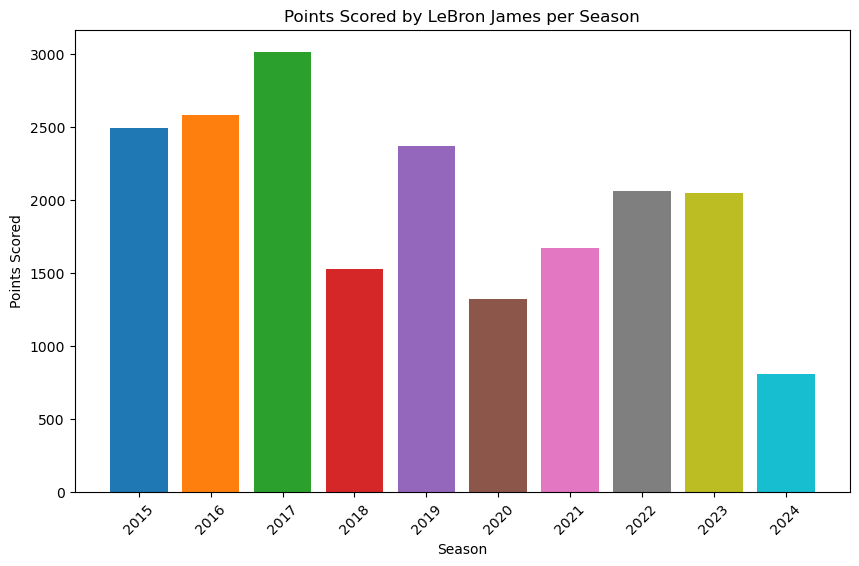

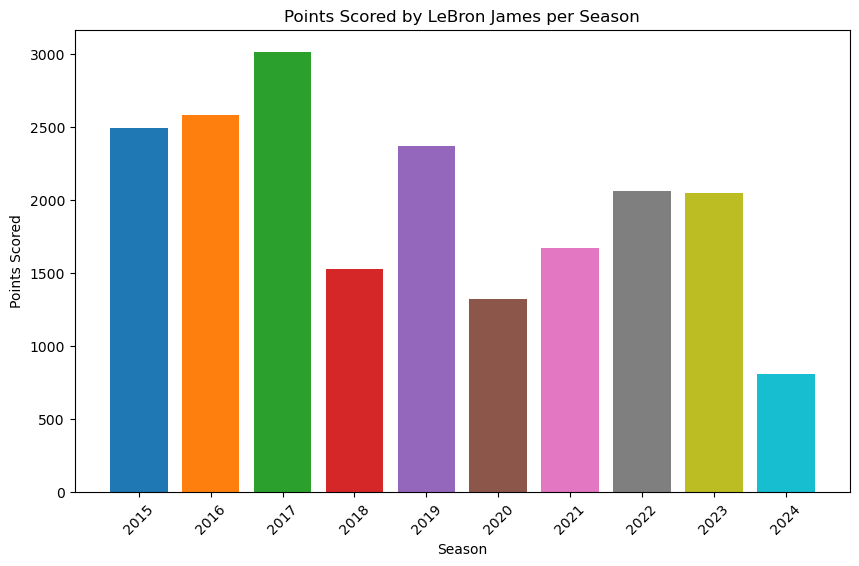

In [15]:
df_nba.chat("Plot points scored by LeBron James showing for each season, using different colors for each bar")

'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

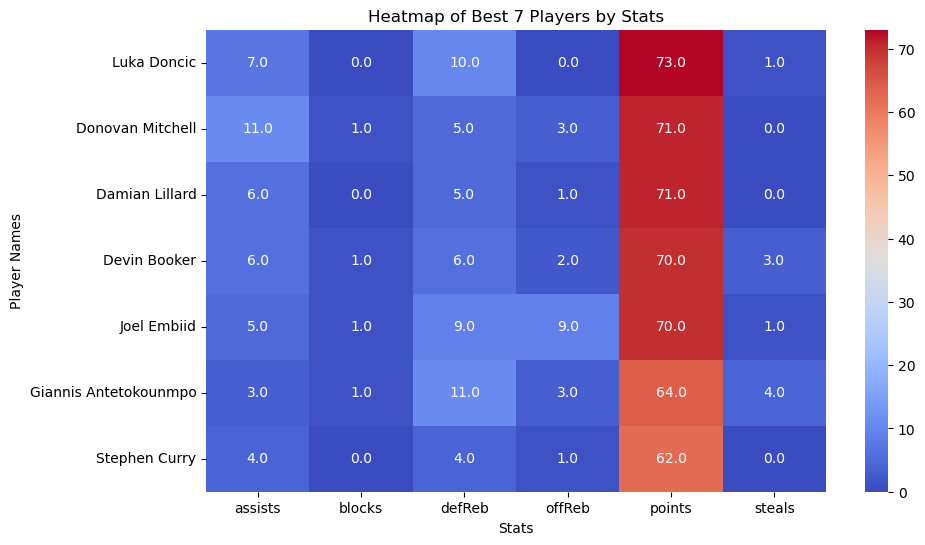

In [16]:
df_nba.chat("Plot heatmap of the best 7 player_names")